In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import networkx as nx
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/iupui-link-prediction/features.csv
/kaggle/input/iupui-link-prediction/sample_submission.csv
/kaggle/input/iupui-link-prediction/train_edges.csv


In [2]:
train_file = "/kaggle/input/iupui-link-prediction/train_edges.csv";
sample_sub = "/kaggle/input/iupui-link-prediction/sample_submission.csv"
test_file = "/kaggle/input/iupui-link-prediction/features.csv";

In [3]:
#Load the input files
import csv

G = nx.Graph()

with open(train_file) as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        if row[1]=='1':
            edge= row[0].split('-')
            G.add_edge(int(edge[0]),int(edge[1]))

2506


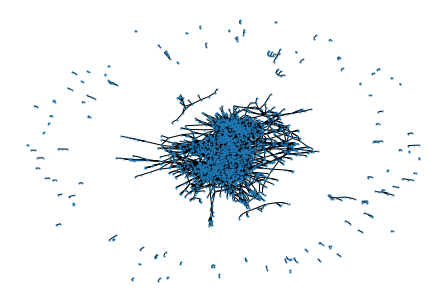

In [4]:
#Node info
print(G.number_of_nodes());
nx.draw(G,node_size = 1);

In [5]:
# next let's read in the possible edges we need to classify from the test file
Gsub = nx.Graph()

with open(sample_sub) as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        if row[1]=='1' or row[1]=='0':
            edge= row[0].split('-')
            Gsub.add_edge(int(edge[0]),int(edge[1]))

In [6]:
print(G)
list(G.nodes)         
print(Gsub.nodes)
# we need to add the nodes from the test data to training network (some are new nodes)
G.add_nodes_from(Gsub.nodes)


[2020, 976, 1989, 772, 199, 933, 2373, 1622, 21, 998, 66, 1269, 1569, 908, 212, 2382, 1444, 2353, 2042, 981, 1543, 1506, 0, 1344, 421, 655, 240, 2492, 324, 325, 2043, 436, 1401, 2322, 1087, 372, 1565, 423, 1775, 1633, 146, 1439, 1694, 1664, 703, 1512, 305, 2021, 2698, 625, 90, 313, 376, 2094, 2645, 2331, 2164, 867, 1778, 1763, 820, 34, 355, 2532, 1406, 487, 486, 2398, 681, 784, 521, 1789, 1877, 60, 2659, 760, 2255, 921, 2621, 263, 2490, 1908, 2047, 745, 2611, 1851, 121, 154, 897, 1679, 2153, 224, 2026, 27, 1099, 356, 2626, 1365, 2622, 2640, 2095, 1194, 829, 2479, 932, 856, 1765, 1589, 1063, 2407, 2053, 261, 1641, 125, 108, 2330, 878, 1844, 443, 594, 2013, 1489, 1199, 2122, 1052, 2102, 1223, 1803, 1064, 1660, 229, 757, 2224, 1226, 353, 1990, 535, 1121, 420, 2156, 2125, 729, 1380, 315, 1317, 3, 413, 35, 361, 1808, 1393, 2620, 2024, 676, 1901, 310, 2014, 664, 2142, 1004, 380, 17, 18, 642, 954, 791, 1829, 268, 1405, 1346, 1320, 52, 2280, 101, 1015, 2451, 1724, 657, 1847, 1571, 317, 41, 65

In [7]:
# here is a simple algorithm to get you started...for each possible edge i-j in the test set
# we will count the number of nodes in the training graph they have in common...if they have
# one or more "mutual friends" then we will connect them (this will score about .67 acc on kaggle)
with open('/kaggle/working/submission.csv', 'w') as csvfile:
    fieldnames = ['edge', 'label']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    with open(sample_sub) as csvfile2:
        reader = csv.reader(csvfile2, delimiter=',')
        for row in reader:
            if row[1]=='1' or row[1]=='0':
                edge= row[0].split('-')

                i=int(edge[0])
                j=int(edge[1])
                
                # here networkx has a common_neighbors function
                num_com_neigh=len(sorted(nx.common_neighbors(G, i, j)))
                y=0
                if num_com_neigh>0:
                    y=1

                edg_out=str(i)+"-"+str(j)    
                writer.writerow({'edge': edg_out, 'label': y})
                print(edg_out, num_com_neigh, y)

2020-976 0 0
1989-772 0 0
199-933 0 0
2373-1622 0 0
21-998 0 0
66-1269 0 0
1569-908 0 0
212-2382 0 0
1444-2353 0 0
2042-981 0 0
1543-1506 0 0
0-1344 6 1
421-655 0 0
240-2492 1 1
324-325 0 0
2043-436 0 0
1401-2322 0 0
1087-372 0 0
1565-423 0 0
1775-1633 0 0
146-1439 0 0
1694-1664 0 0
703-1512 0 0
305-2021 0 0
2698-625 1 1
90-313 1 1
376-2094 0 0
2645-2331 0 0
2164-867 0 0
998-1778 0 0
1763-820 0 0
34-355 0 0
2532-1406 0 0
487-486 1 1
2398-681 0 0
784-521 0 0
1694-1789 0 0
1877-60 0 0
2659-760 0 0
2255-921 1 1
2621-263 0 0
2490-1908 0 0
2047-745 1 1
2020-2611 0 0
1851-121 0 0
154-897 0 0
1679-2153 0 0
224-2026 0 0
27-1099 0 0
356-2626 0 0
1365-2622 0 0
1877-2640 0 0
2095-1194 0 0
829-2479 0 0
932-856 0 0
1765-1589 0 0
1063-2407 0 0
2053-261 0 0
1641-125 0 0
108-2330 0 0
878-1844 0 0
443-594 0 0
2013-1489 0 0
0-1199 1 1
2122-1052 0 0
2102-1223 0 0
1803-1064 0 0
1660-229 0 0
757-2224 0 0
1226-353 0 0
1990-535 1 1
1121-420 0 0
2156-2125 0 0
729-1380 0 0
315-1317 0 0
3-413 0 0
35-361 0 0
180